In [1]:
import pandas
import numpy as np
from sklearn.metrics import classification_report
import sklearn
print(sklearn.__version__)
train_data = pandas.read_csv('dataset/Kaggle_Training_Dataset.csv')
train_data = train_data.set_index('sku')

0.18.1


In [2]:

test_data = pandas.read_csv('dataset/Kaggle_Test_Dataset.csv')
test_data = test_data.set_index('sku')

In [3]:
# print(train_data[:10])

In [4]:
#print all the columns/features
print("shape =",train_data.shape)
print("columns = ", train_data.columns.values)

shape = (1693050, 22)
columns =  ['national_inv' 'lead_time' 'in_transit_qty' 'forecast_3_month'
 'forecast_6_month' 'forecast_9_month' 'sales_1_month' 'sales_3_month'
 'sales_6_month' 'sales_9_month' 'min_bank' 'potential_issue'
 'pieces_past_due' 'perf_6_month_avg' 'perf_12_month_avg' 'local_bo_qty'
 'deck_risk' 'oe_constraint' 'ppap_risk' 'stop_auto_buy' 'rev_stop'
 'went_on_backorder']


In [4]:
#distribution of 'went_on_backorder'
yes_shape = train_data[train_data['went_on_backorder'] == 'Yes'].shape
no_shape = train_data[train_data['went_on_backorder'] == 'No'].shape
print("went_on_backorder = Yes = ", yes_shape)
print("went_on_backorder = No = ", no_shape)
print("went_on_backorder = % of Yes/no = ", yes_shape[0]*100.0/train_data.shape[0])

went_on_backorder = Yes =  (10914, 22)
went_on_backorder = No =  (1682136, 22)
went_on_backorder = % of Yes/no =  0.6446354212811198


potential_issue
Went on backorder
35
YES % =  0.32068902327286053
deck_risk
Went on backorder
1577
YES % =  14.449331134322888
oe_constraint
Went on backorder
5
YES % =  0.04581271761040865
ppap_risk
Went on backorder
1578
YES % =  14.45849367784497
stop_auto_buy
Went on backorder
10434
YES % =  95.60197910940077
rev_stop
Went on backorder
17
YES % =  0.1557632398753894


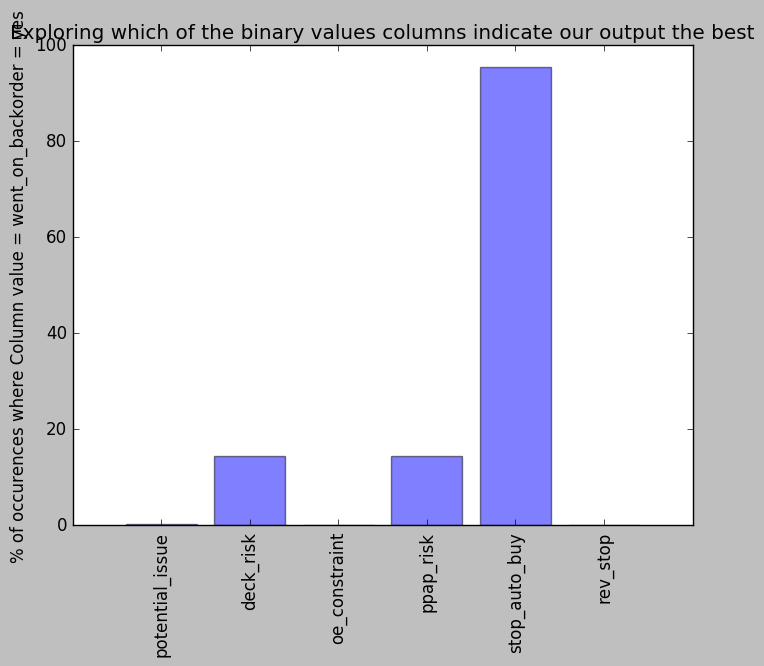

In [19]:
#not_went_on_backorder = train_data[train_data['went_on_backorder'] == 'No']
#went_on_backorder = train_data[train_data['went_on_backorder'] == 'Yes']
#import matplotlib.pyplot as plt


columns = ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']
yes_data_for_col = []
for col in columns:
    print(col)
    print("Went on backorder")
    yes_len = train_data[(train_data[col] == 'Yes') & (train_data['went_on_backorder'] == 'Yes')].shape[0]
    no_len = train_data[(train_data[col] == 'No') & (train_data['went_on_backorder'] == 'Yes')].shape[0]
    print(yes_len);
    #print(no_len);
    print("YES % = ",yes_len*100.0/(yes_shape[0]))
    yes_data_for_col.append(yes_len*100.0/(yes_shape[0]))
    #print("NO % = ",no_len*100.0/(yes_len+no_len))
    print("============================")

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
y_pos = np.arange(len(columns))
 
plt.bar(y_pos, yes_data_for_col, align='center', alpha=0.5)
plt.xticks(y_pos,columns,rotation='vertical')
plt.ylabel('% of occurences where Column value = went_on_backorder = yes')
plt.title('Exploring which of the binary values columns indicate our output the best')
 
plt.show()

In [7]:
#dig deeper into stop_auto_buy

print ("Total size = ", train_data.shape[0])
print ("True positive = ",train_data[(train_data['stop_auto_buy'] == 'Yes') & (train_data['went_on_backorder'] == 'Yes')].shape[0])
print ("True negative = ",train_data[(train_data['stop_auto_buy'] == 'No') & (train_data['went_on_backorder'] == 'No')].shape[0])
print ("False positive = ",train_data[(train_data['stop_auto_buy'] == 'Yes') & (train_data['went_on_backorder'] == 'No')].shape[0])
print ("False negative = ",train_data[(train_data['stop_auto_buy'] == 'No') & (train_data['went_on_backorder'] == 'Yes')].shape[0])

Total size =  1693050
True positive =  10434
True negative =  65233
False positive =  1616903
False negative =  480


In [3]:
def process(df):
    """We turn some of the features in to binary."""
    for col in ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
               'stop_auto_buy', 'rev_stop', 'went_on_backorder']:
        df[col] = (df[col] == 'Yes').astype(int)
    return df
train_data = process(train_data).dropna()
test_data = process(test_data).dropna()
from sklearn.ensemble import RandomForestClassifier

est = RandomForestClassifier(n_jobs=-1, n_estimators=100, min_samples_split=10,
                             max_depth=10, class_weight='balanced')

In [4]:
X, y = train_data.drop('went_on_backorder', axis=1), train_data.went_on_backorder
X2, y2 = test_data.drop('went_on_backorder', axis=1), test_data.went_on_backorder

In [10]:
est.fit(X, y)
preds = est.predict_proba(X2)
pred_labels = np.argmax(preds, axis=1)
print(classification_report(y2, pred_labels))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94    225210
          1       0.07      0.82      0.13      2280

avg / total       0.99      0.89      0.93    227490



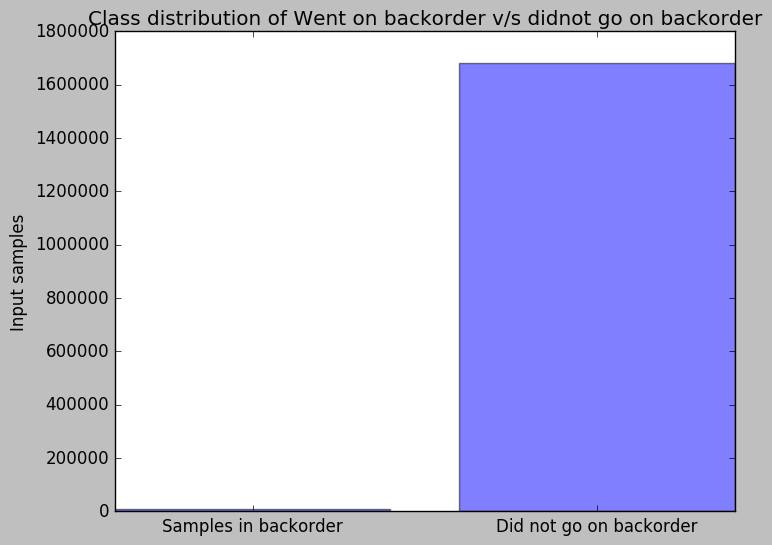

In [11]:
#lets explore data

#class distribution histogram

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('Samples in backorder', 'Did not go on backorder')
y_pos = np.arange(len(objects))
performance = [yes_shape[0],no_shape[0]]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Input samples')
plt.title('Class distribution of Went on backorder v/s didnot go on backorder')
 
plt.show()




[  2.79649220e-01   1.78785994e-02   4.26608567e-02   2.17615622e-01
   1.21459655e-01   8.98165430e-02   3.92484385e-02   4.40293894e-02
   2.84514235e-02   3.37727873e-02   2.03503848e-02   8.45820168e-05
   1.33147182e-03   1.65590629e-02   1.89116556e-02   1.91028136e-02
   4.13470259e-03   3.74973042e-06   2.12416882e-03   1.41787744e-03
   1.39699553e-03]
1.0


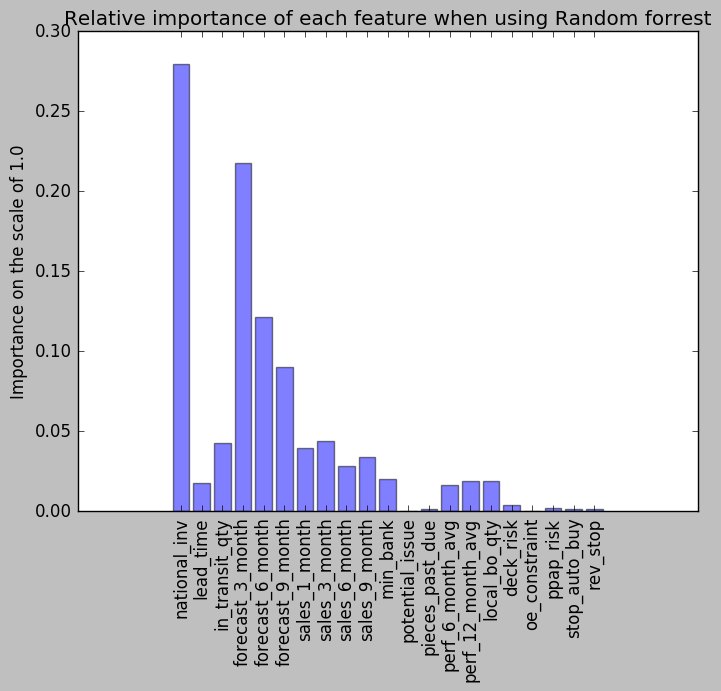

In [12]:
#lets examine the feature importance
print(est.feature_importances_)
print(np.sum(est.feature_importances_))


objects = tuple(train_data.columns.values[:-1])
y_pos = np.arange(len(objects))
performance = est.feature_importances_

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Importance on the scale of 1.0')
plt.title('Relative importance of each feature when using Random forrest')
 
plt.show()

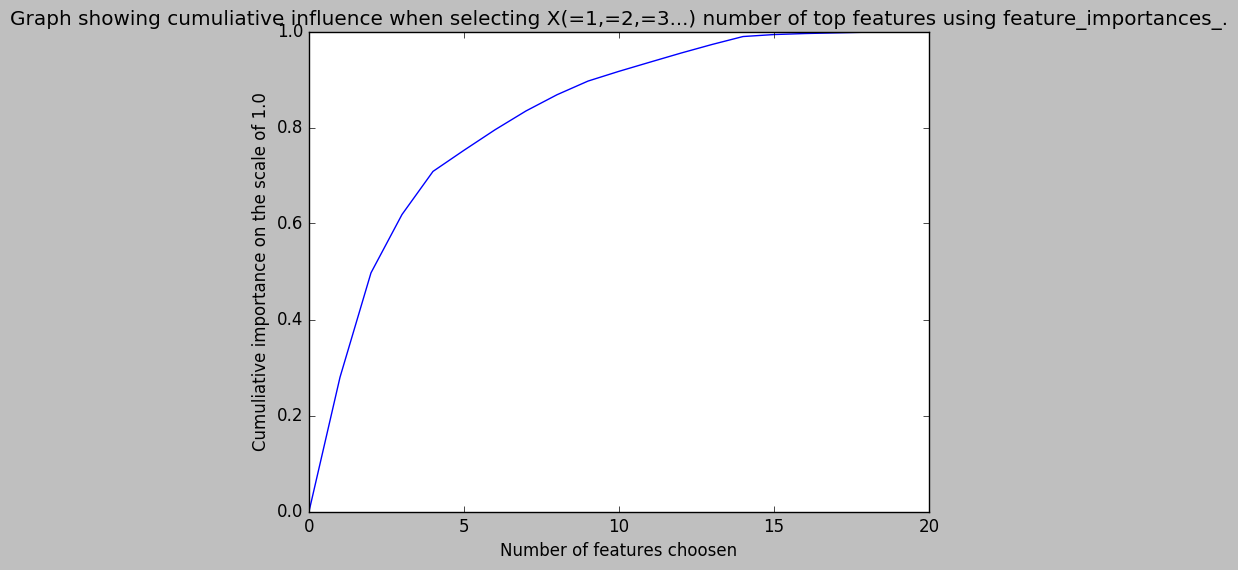

In [13]:
#top N features that influence the most are

sum = np.zeros(21)
for N in range(1,21):
    topNIndicies = np.argpartition(est.feature_importances_, -N)[-N:]
    #print("Top N features where N =",N)
    sum[N] = 0;
    for i in topNIndicies:
        sum[N] += est.feature_importances_[i]
        #print(train_data.columns.values[i], " = ", est.feature_importances_[i])
    #print("Top N features total influence on a scale of 1.0 = ",sum)

plt.plot(sum)
plt.ylabel('Cumuliative importance on the scale of 1.0')
plt.xlabel('Number of features choosen')
plt.title("Graph showing cumuliative influence when selecting X(=1,=2,=3...) number of top features using feature_importances_.")
plt.show()

In [14]:
N=15
topNIndicies = np.argpartition(est.feature_importances_, -N)[-N:]
print("Top N features where N =",N)
sum = 0;
for i in topNIndicies:
    sum += est.feature_importances_[i]
    print(train_data.columns.values[i], " = ", est.feature_importances_[i])
print("Top N features total influence on a scale of 1.0 = ",sum)

Top N features where N = 15
deck_risk  =  0.00413470259196
perf_12_month_avg  =  0.0189116555902
perf_6_month_avg  =  0.0165590629142
local_bo_qty  =  0.019102813646
lead_time  =  0.017878599421
min_bank  =  0.0203503848397
sales_9_month  =  0.0337727873095
sales_6_month  =  0.028451423464
sales_3_month  =  0.0440293893512
sales_1_month  =  0.0392484384981
forecast_9_month  =  0.0898165429864
forecast_6_month  =  0.121459655409
forecast_3_month  =  0.217615621533
in_transit_qty  =  0.0426608567174
national_inv  =  0.279649220368
Top N features total influence on a scale of 1.0 =  0.993641154639


In [14]:
#lets try normal decision trees first.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'max_depth':[10,15]}]
cv = StratifiedKFold(n_splits=5)
clf = GridSearchCV(DecisionTreeClassifier(random_state=42), tuned_parameters, cv=cv,verbose=10, n_jobs=4)
clf.fit(X, y)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y2, clf.predict(X2)
print(classification_report(y_true, y_pred))
print()

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] max_depth=10 ....................................................
[CV] max_depth=10 ....................................................
[CV] max_depth=10 ....................................................
[CV] max_depth=10 ....................................................
[CV] ..................... max_depth=10, score=0.992866, total=  14.9s
[CV] max_depth=10 ....................................................
[CV] ..................... max_depth=10, score=0.993432, total=  15.4s
[CV] max_depth=15 ....................................................
[CV] ..................... max_depth=10, score=0.993494, total=  15.4s
[CV] max_depth=15 ....................................................
[CV] ..................... max_depth=10, score=0.993231, total=  15.5s
[CV] max_depth=15 ....................................................
[CV] ..................... max_depth=10, score=0.993077, total=  14.2s
[CV] max_depth=15

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:   31.7s remaining:   31.7s


[CV] ..................... max_depth=15, score=0.991826, total=  17.3s
[CV] max_depth=15 ....................................................
[CV] ..................... max_depth=15, score=0.993450, total=  17.5s


[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:   36.5s remaining:   15.6s


[CV] ..................... max_depth=15, score=0.993853, total=  17.5s
[CV] ..................... max_depth=15, score=0.992907, total=  14.9s
[CV] ..................... max_depth=15, score=0.992144, total=  13.5s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   49.8s finished


Best parameters set found on development set:

{'max_depth': 10}

Grid scores on development set:

0.993 (+/-0.000) for {'max_depth': 10}
0.993 (+/-0.002) for {'max_depth': 15}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    225210
          1       0.29      0.02      0.03      2280

avg / total       0.98      0.99      0.99    227490




In [27]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_estimators': [100,200],
                      'criterion': ['entropy','gini'],
                   'max_depth':[10,15]}]
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

scores = ['precision', 'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    cv = StratifiedKFold(n_splits=5)
    clf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), tuned_parameters, cv=cv,
                       scoring='%s_macro' % score, verbose=10, n_jobs=4)
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y2, clf.predict(X2)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, score=0.523295, total= 4.1min
[CV] criterion=entropy, max_depth=10, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, score=0.525738, total= 4.1min
[CV] criterion=entropy, max_depth=10, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, score=0.524875, total= 4.2min
[CV] criterion=entropy, max_depth=10, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=100, score=0.524176, total= 4.2min
[CV] criterion=entropy, max_depth=10, n_estimators=200

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  9.0min


[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.523731, total= 8.5min
[CV] criterion=entropy, max_depth=10, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.525267, total= 8.5min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.524882, total= 8.5min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.524321, total= 8.6min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.536687, total= 5.1min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 19.1min


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.543365, total= 5.1min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.523985, total= 8.6min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.546222, total= 5.1min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.543300, total= 5.2min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.540759, total= 5.1min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.536033, total=10.0min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 34.3min


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.545203, total=10.2min
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.542844, total=10.2min
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.523958, total= 4.4min
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.526288, total= 4.3min
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.526327, total= 4.3min
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.524508, total= 4.3min
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 44.0min


[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.524540, total= 4.3min
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.523665, total= 8.4min
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.525548, total= 8.4min
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.526060, total= 8.4min
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.524337, total= 8.5min
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.535226, total= 5.0min
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.524270, 

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 58.9min


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.541641, total= 5.1min
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.540183, total= 5.1min
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.535509, total=10.0min
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.542586, total=10.1min
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.544797, total= 9.8min


[Parallel(n_jobs=4)]: Done  38 out of  40 | elapsed: 73.5min remaining:  3.9min


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.542441, total= 9.8min
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.540343, total= 9.8min


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 79.3min finished


Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}

Grid scores on development set:

0.524 (+/-0.002) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
0.524 (+/-0.001) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
0.542 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
0.542 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
0.525 (+/-0.002) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
0.525 (+/-0.002) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
0.541 (+/-0.006) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}
0.541 (+/-0.006) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

     

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  9.4min


[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.518613, total= 8.8min
[CV] criterion=entropy, max_depth=10, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.519412, total= 8.8min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.517894, total= 8.8min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.516379, total= 8.9min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.551840, total= 5.1min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 19.8min


[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.564565, total= 5.1min
[CV] criterion=entropy, max_depth=15, n_estimators=100 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=200, score=0.514205, total= 8.6min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.565723, total= 5.2min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.562034, total= 5.2min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=100, score=0.558597, total= 5.2min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.551439, total=10.0min
[CV] criterion=entropy, max_depth=15, n_estimators=200 ...............
[CV]  criterion=entropy, max_depth=15, n_estimators=

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed: 35.0min


[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.568676, total=10.2min
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0.564420, total=10.3min
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.517928, total= 4.3min
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.522300, total= 4.3min
[CV] criterion=gini, max_depth=10, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.519910, total= 4.3min
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.515697, total= 4.3min
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=entropy, max_depth=15, n_estimators=200, score=0

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed: 44.8min


[CV]  criterion=gini, max_depth=10, n_estimators=100, score=0.515109, total= 4.3min
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.518457, total= 8.5min
[CV] criterion=gini, max_depth=10, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.522650, total= 8.5min
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.522380, total= 8.5min
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.517071, total= 8.5min
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.549570, total= 5.1min
[CV] criterion=gini, max_depth=15, n_estimators=100 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=200, score=0.514370, 

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 59.9min


[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.562647, total= 5.2min
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=100, score=0.558738, total= 5.2min
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.550896, total=10.1min
[CV] criterion=gini, max_depth=15, n_estimators=200 ..................
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.563439, total=10.3min
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.565221, total=10.0min


[Parallel(n_jobs=4)]: Done  38 out of  40 | elapsed: 74.7min remaining:  3.9min


[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.561157, total=10.0min
[CV]  criterion=gini, max_depth=15, n_estimators=200, score=0.557457, total= 9.9min


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed: 80.5min finished


Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}

Grid scores on development set:

0.517 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
0.517 (+/-0.004) for {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
0.561 (+/-0.010) for {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
0.562 (+/-0.012) for {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}
0.518 (+/-0.005) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
0.519 (+/-0.006) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
0.560 (+/-0.011) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 100}
0.560 (+/-0.010) for {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

     

In [16]:
# Support vector machines

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

tuned_parameters = [{'C' : [0.5,1.0,1.5],
                     'loss' : ['hinge','squared_hinge']}]
scores = ['precision', 'f1']

for score in scores:
    cv = StratifiedKFold(n_splits=4)
    clf = GridSearchCV(LinearSVC(random_state=42), tuned_parameters, scoring='%s_macro' % score, cv=cv, verbose=10, n_jobs=8)
    clf.fit(X, y)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y2, clf.predict(X2)
    print(classification_report(y_true, y_pred))
    print()


Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] loss=hinge, C=0.5 ...............................................
[CV] loss=hinge, C=0.5 ...............................................
[CV] loss=hinge, C=0.5 ...............................................
[CV] loss=hinge, C=0.5 ...............................................
[CV] loss=squared_hinge, C=0.5 .......................................
[CV] loss=squared_hinge, C=0.5 .......................................
[CV] loss=squared_hinge, C=0.5 .......................................
[CV] loss=squared_hinge, C=0.5 .......................................
[CV] ................ loss=hinge, C=0.5, score=0.509319, total= 8.3min
[CV] loss=hinge, C=1.0 ...............................................
[CV] ................ loss=hinge, C=0.5, score=0.517730, total= 8.4min
[CV] loss=hinge, C=1.0 ...............................................


[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  8.4min


[CV] ................ loss=hinge, C=0.5, score=0.500681, total= 8.4min
[CV] loss=hinge, C=1.0 ...............................................
[CV] ........ loss=squared_hinge, C=0.5, score=0.511533, total= 8.4min
[CV] loss=hinge, C=1.0 ...............................................
[CV] ........ loss=squared_hinge, C=0.5, score=0.525011, total= 8.5min
[CV] loss=squared_hinge, C=1.0 .......................................
[CV] ........ loss=squared_hinge, C=0.5, score=0.512795, total= 8.5min
[CV] loss=squared_hinge, C=1.0 .......................................
[CV] ................ loss=hinge, C=0.5, score=0.511263, total= 8.5min
[CV] loss=squared_hinge, C=1.0 .......................................
[CV] ........ loss=squared_hinge, C=0.5, score=0.505673, total= 8.5min
[CV] loss=squared_hinge, C=1.0 .......................................
[CV] ................ loss=hinge, C=1.0, score=0.507707, total= 8.3min
[CV] loss=hinge, C=1.5 ...............................................


[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed: 16.6min


[CV] ................ loss=hinge, C=1.0, score=0.521388, total= 8.4min
[CV] loss=hinge, C=1.5 ...............................................
[CV] ................ loss=hinge, C=1.0, score=0.502165, total= 8.4min
[CV] loss=hinge, C=1.5 ...............................................
[CV] ........ loss=squared_hinge, C=1.0, score=0.513095, total= 8.4min
[CV] loss=hinge, C=1.5 ...............................................


[Parallel(n_jobs=8)]: Done  12 out of  24 | elapsed: 16.9min remaining: 16.9min


[CV] ................ loss=hinge, C=1.0, score=0.548870, total= 8.5min
[CV] ........ loss=squared_hinge, C=1.0, score=0.516973, total= 8.4min
[CV] loss=squared_hinge, C=1.5 .......................................
[CV] loss=squared_hinge, C=1.5 .......................................
[CV] ........ loss=squared_hinge, C=1.0, score=0.521218, total= 8.4min
[CV] loss=squared_hinge, C=1.5 .......................................


[Parallel(n_jobs=8)]: Done  15 out of  24 | elapsed: 17.0min remaining: 10.2min


[CV] ........ loss=squared_hinge, C=1.0, score=0.509432, total= 8.5min
[CV] loss=squared_hinge, C=1.5 .......................................
[CV] ................ loss=hinge, C=1.5, score=0.503987, total= 8.2min
[CV] ................ loss=hinge, C=1.5, score=0.517002, total= 8.2min


[Parallel(n_jobs=8)]: Done  18 out of  24 | elapsed: 25.0min remaining:  8.3min


[CV] ................ loss=hinge, C=1.5, score=0.504820, total= 8.2min
[CV] ........ loss=squared_hinge, C=1.5, score=0.519424, total= 8.2min
[CV] ........ loss=squared_hinge, C=1.5, score=0.523887, total= 8.2min


[Parallel(n_jobs=8)]: Done  21 out of  24 | elapsed: 25.2min remaining:  3.6min


[CV] ................ loss=hinge, C=1.5, score=0.503774, total= 8.3min
[CV] ........ loss=squared_hinge, C=1.5, score=0.505121, total= 8.2min
[CV] ........ loss=squared_hinge, C=1.5, score=0.520613, total= 8.2min


[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed: 25.3min remaining:    0.0s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed: 25.3min finished


Best parameters set found on development set:

{'loss': 'hinge', 'C': 1.0}

Grid scores on development set:

0.510 (+/-0.012) for {'loss': 'hinge', 'C': 0.5}
0.514 (+/-0.014) for {'loss': 'squared_hinge', 'C': 0.5}
0.520 (+/-0.036) for {'loss': 'hinge', 'C': 1.0}
0.515 (+/-0.009) for {'loss': 'squared_hinge', 'C': 1.0}
0.507 (+/-0.011) for {'loss': 'hinge', 'C': 1.5}
0.517 (+/-0.014) for {'loss': 'squared_hinge', 'C': 1.5}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    225210
          1       0.02      0.00      0.00      2280

avg / total       0.98      0.99      0.98    227490


Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] loss=hinge, C=0.5 ...............................................
[CV] loss=hinge, C=0.5 ...............................................
[CV] loss=hinge, C

[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  7.7min


[CV] ................ loss=hinge, C=0.5, score=0.499290, total= 7.7min
[CV] loss=hinge, C=1.0 ...............................................
[CV] ........ loss=squared_hinge, C=0.5, score=0.513691, total= 7.7min
[CV] loss=hinge, C=1.0 ...............................................
[CV] ........ loss=squared_hinge, C=0.5, score=0.528347, total= 7.8min
[CV] loss=squared_hinge, C=1.0 .......................................
[CV] ........ loss=squared_hinge, C=0.5, score=0.517406, total= 7.8min
[CV] loss=squared_hinge, C=1.0 .......................................
[CV] ................ loss=hinge, C=0.5, score=0.507749, total= 7.8min
[CV] loss=squared_hinge, C=1.0 .......................................
[CV] ........ loss=squared_hinge, C=0.5, score=0.497400, total= 7.9min
[CV] loss=squared_hinge, C=1.0 .......................................
[CV] ................ loss=hinge, C=1.0, score=0.509552, total= 7.7min
[CV] loss=hinge, C=1.5 ...............................................


[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed: 15.4min


[CV] ................ loss=hinge, C=1.0, score=0.503542, total= 7.8min
[CV] loss=hinge, C=1.5 ...............................................
[CV] ................ loss=hinge, C=1.0, score=0.493204, total= 7.8min
[CV] loss=hinge, C=1.5 ...............................................
[CV] ........ loss=squared_hinge, C=1.0, score=0.517562, total= 7.7min
[CV] loss=hinge, C=1.5 ...............................................


[Parallel(n_jobs=8)]: Done  12 out of  24 | elapsed: 15.6min remaining: 15.6min


[CV] ................ loss=hinge, C=1.0, score=0.536404, total= 7.9min
[CV] loss=squared_hinge, C=1.5 .......................................
[CV] ........ loss=squared_hinge, C=1.0, score=0.522119, total= 7.8min
[CV] loss=squared_hinge, C=1.5 .......................................
[CV] ........ loss=squared_hinge, C=1.0, score=0.511762, total= 7.8min
[CV] loss=squared_hinge, C=1.5 .......................................


[Parallel(n_jobs=8)]: Done  15 out of  24 | elapsed: 15.7min remaining:  9.4min


[CV] ........ loss=squared_hinge, C=1.0, score=0.505970, total= 7.9min
[CV] loss=squared_hinge, C=1.5 .......................................
[CV] ................ loss=hinge, C=1.5, score=0.422288, total= 7.9min
[CV] ................ loss=hinge, C=1.5, score=0.511294, total= 7.9min


[Parallel(n_jobs=8)]: Done  18 out of  24 | elapsed: 23.4min remaining:  7.8min


[CV] ................ loss=hinge, C=1.5, score=0.498629, total= 7.9min
[CV] ........ loss=squared_hinge, C=1.5, score=0.523844, total= 7.9min
[CV] ................ loss=hinge, C=1.5, score=0.498967, total= 8.0min
[CV] ........ loss=squared_hinge, C=1.5, score=0.529822, total= 7.9min


[Parallel(n_jobs=8)]: Done  21 out of  24 | elapsed: 23.6min remaining:  3.4min


[CV] ........ loss=squared_hinge, C=1.5, score=0.433002, total= 7.9min
[CV] ........ loss=squared_hinge, C=1.5, score=0.519592, total= 7.9min


[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed: 23.7min remaining:    0.0s
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed: 23.7min finished


Best parameters set found on development set:

{'loss': 'squared_hinge', 'C': 1.0}

Grid scores on development set:

0.506 (+/-0.009) for {'loss': 'hinge', 'C': 0.5}
0.514 (+/-0.022) for {'loss': 'squared_hinge', 'C': 0.5}
0.511 (+/-0.032) for {'loss': 'hinge', 'C': 1.0}
0.514 (+/-0.012) for {'loss': 'squared_hinge', 'C': 1.0}
0.483 (+/-0.071) for {'loss': 'hinge', 'C': 1.5}
0.502 (+/-0.080) for {'loss': 'squared_hinge', 'C': 1.5}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.99      0.98      0.99    225210
          1       0.05      0.10      0.06      2280

avg / total       0.98      0.97      0.98    227490




In [140]:
#lets loop through the data and find the min/max to regularize data for certain columns
columns_to_regularize = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month',
 'sales_6_month', 'sales_9_month', 'min_bank', 
 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']

# Columns with 0/1 value
# ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
#                'stop_auto_buy', 'rev_stop', 'went_on_backorder']

X_regularized = X.copy()
y_copy = y.copy()
X2_regularized = X2.copy()
y2_copy = y2.copy()

rows_to_drop = []
for column_to_regularize in columns_to_regularize:
    max_tmp = X[column_to_regularize].max()
    min_tmp = X[column_to_regularize].min()
    diff_tmp = abs(max_tmp - min_tmp)
#     print(column_to_regularize,'\n\t',max_tmp,min_tmp,diff_to_regularize[column_to_regularize])
    X_regularized[column_to_regularize] = X[column_to_regularize]/diff_tmp
    X2_regularized[column_to_regularize] = X2[column_to_regularize]/diff_tmp

from random import randint
for i, row in X_regularized.iterrows():
    if y_copy[i] == 0 and randint(0,10000) < 8000:
        rows_to_drop.append(i)

X_regularized.drop(rows_to_drop,inplace=True)
y_copy.drop(rows_to_drop,inplace=True)

In [157]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
print(keras.__version__)

model = Sequential()
model.add(Dense(21, input_dim=21))
model.add(Activation('relu'))
model.add(Dense(14))
model.add(Activation('relu'))
model.add(Dense(7))
Activation('softmax')
model.add(Dense(1))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

1.2.2
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_51 (Dense)                 (None, 21)            462         dense_input_17[0][0]             
____________________________________________________________________________________________________
activation_34 (Activation)       (None, 21)            0           dense_51[0][0]                   
____________________________________________________________________________________________________
dense_52 (Dense)                 (None, 14)            308         activation_34[0][0]              
____________________________________________________________________________________________________
activation_35 (Activation)       (None, 14)            0           dense_52[0][0]                   
_____________________________________________________________________________________

In [165]:
# Train the model, iterating on the data in batches of 32 samples
history_object = model.fit(np.array(X_regularized), np.array(y_copy), nb_epoch=4, batch_size=6400)

Epoch 1/4
328143/328143 [==============================] - 0s - loss: 0.1497 - acc: 0.9677     
Epoch 2/4
328143/328143 [==============================] - 0s - loss: 0.1510 - acc: 0.9677     
Epoch 3/4
328143/328143 [==============================] - 0s - loss: 0.1480 - acc: 0.9677     
Epoch 4/4
328143/328143 [==============================] - 0s - loss: 0.1498 - acc: 0.9677     


In [166]:
classes = model.predict(np.array(X2_regularized), batch_size=128)

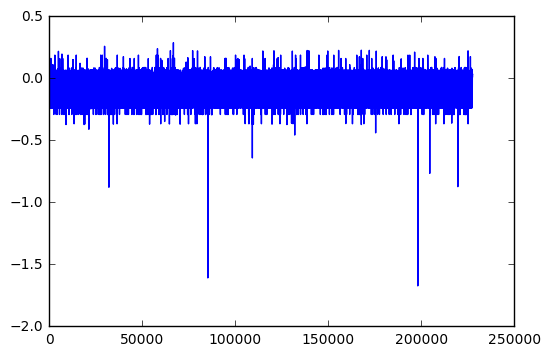

In [167]:
import matplotlib.pyplot as plt
plt.plot(classes)
plt.show()

In [174]:
classes_pred = np.copy(classes)
for i in range(len(classes_pred)):
    if (classes[i]) > 0.1 or classes[i] < -0.35:
        classes_pred[i] = 1
    else:
        classes_pred[i] = 0
print(classification_report(np.array(y2_copy), classes_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    225210
          1       0.05      0.00      0.01      2280

avg / total       0.98      0.99      0.98    227490

